In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

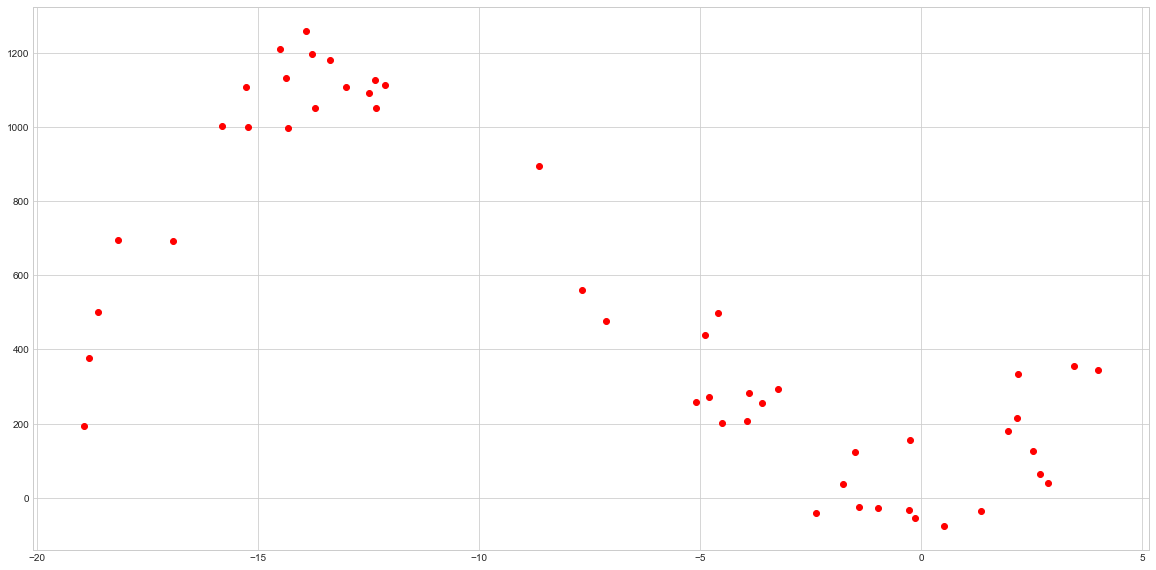

In [2]:
noise_scale = 100
number_of_samples = 50
x = 25*(np.random.rand(number_of_samples) - 0.8)
y = 5 * x + 20 * x**2 + 1 * x**3 + noise_scale*np.random.randn(number_of_samples)
plt.figure(figsize=(20,10))
plt.plot(x,y,'ro')
plt.show()

## Polynomial Fitting:

poly1d([ 0.97886355, 19.65460072,  3.31630779,  0.98888261])

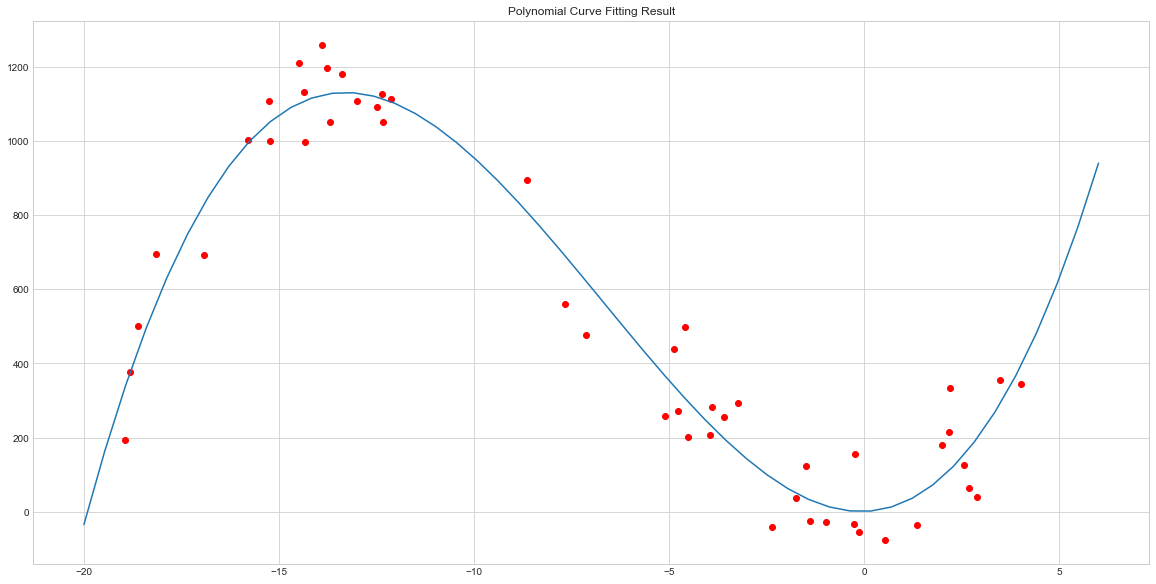

In [3]:
poly = np.poly1d(np.polyfit(x,y,3))
xn = np.linspace(-20, 6, 50)
yn = poly(xn)
plt.figure(figsize=(20,10))
plt.plot(x,y,'ro')
plt.plot(xn,yn)
plt.title("Polynomial Curve Fitting Result")
poly

In [4]:
mse_poly = 0
for i, d in enumerate(x):
    mse_poly += (y[i] - poly(d))**2/number_of_samples
mse_poly

9027.877357898515

## Genetic Algorithm Curve Fitting:

#### Create 100 four-element arrays of random numbers

Since the polynomial is 3 degree, we use four chromozones or elements

In [5]:
chromo = np.zeros(shape=(100,4),dtype='float') 

In [6]:
for i in range(0,100):
    for j in range(0,4):
        chromo[i][j]=random.uniform(-5,5)
    del j
del i

In [7]:
y_hat = np.empty(100, dtype="object")
mse_ga = np.zeros(100, dtype='float')
High_performing_chromo = np.zeros(shape=(100,4),dtype='float') 

#### For each of the 100 arrays, compute its badness (using all data points). Keep the ten best arrays (discard the other 90). From each array you keep, generate nine new arrays as follows:
(1) Pick a random element of the four.

(2) Pick a random floating-point number between 0.0 and 2.0

(3) Multiply the random element of the array by the random floating-point number. 

(4) Repeat 500 times (or any other number)

In [8]:
for l in range (1,500):
    for j in range(0,100):
        y_hat[j]=np.poly1d(chromo[j])
        mse=0
        for k, d in enumerate(x):
            mse+=(y[k]-y_hat[j](d))**2/number_of_samples
        mse_ga[j]=mse
    k=10
    index = np.argpartition(mse_ga, k)#get the index of top 10 lowest MSE
    for i in range(0,k):
        High_performing_chromo[i*10]=chromo[index[i]]
        for j in range(1,10):
            High_performing_chromo[i*10+j]=chromo[index[i]]
            col=random.randint(0,3)
            High_performing_chromo[i*10+j][col]=High_performing_chromo[i*10+j][col]*random.uniform(0,2)
    chromo=High_performing_chromo


In [9]:
for j in range(0,100):
    y_hat[j]=np.poly1d(chromo[j])
    mse=0
    for k, d in enumerate(x):
        mse=mse+(y[k]-y_hat[j](d))**2/number_of_samples
        mse_ga[j]=mse
k=10
index = np.argpartition(mse_ga, k)
MSE_GA = mse_ga[index[0]]

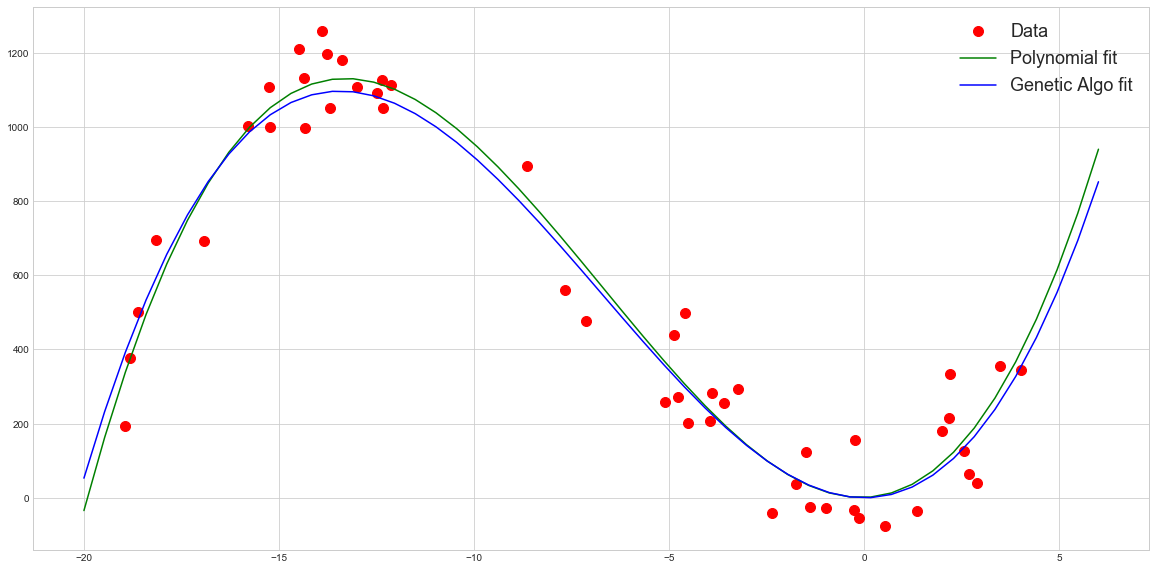

In [10]:
plt.figure(figsize=(20,10))
plt.plot(x,y,'ro',label = "Data",markersize=10)
plt.plot(xn,yn, 'g',label = "Polynomial fit")
#top performing gene is selected to be fitted to the data
plt.plot(xn,y_hat[index[0]](xn), 'b',label = "Genetic Algo fit")
plt.legend(fontsize=18)

In [11]:
print("MSE observed using Polyfit: ", mse_poly)
print("MSE observed using Genetic Algorithm: ", MSE_GA)

MSE observed using Polyfit:  9027.877357898515
MSE observed using Genetic Algorithm:  9632.35521076178
